# TP 2 : Méthode de gradient conjugué
Le but de cette deuxième partie du TP est de programmer, valider et expérimenter l’algorithme du gradient conjugué GC (et sa variante Fletcher-Reeves).


## Etape 1.
> Rappeler l’algorithme GC et l’implémenter. On pourra utilement se servir comme point de départ des codes de gradient développés en Partie 1. Effectuer les tests de validation rapide pour les fonctions quadratiques suivantes ($N = 10, 20, 40$) :
$$
J_{1}(v)=\sum_{i=1}^{i=N}\left(v_{i}-1\right)^{2}, \quad J_{2}(v)=\sum_{i=1}^{i=N}\left(v_{i}-i\right)^{2}
$$


On rappelle que pour une fonction $J$ quadratique :
$$
J(v)=\frac{1}{2} \langle A v, v \rangle -\langle b, v\rangle; \quad\quad\quad \nabla J(v)=A v-b
$$
où $A$ est une matrice symétrique définie positive, l'algorithme GC s'écrit comme suit:

**Pseudocode**

>  
- Initialisation: $u_0 \in {\mathbb R}^n$ arbitraire, $d_0 = \nabla J(u_0) \in {\mathbb R}^n$
- Itérations: répéter pour $k=0,1,\dots$
  - calculer le gradient $G_k = \nabla J (u_{k})$;
  - calculer $\rho_k$
  $$
  \rho_k = \frac{ \langle G_k, d_{k}\rangle}{\langle A d_{k}, d_{k}\rangle};
  $$
  - poser $u_{k+1} = u_{k} - \rho_k d_k$;
  - calculer le gradient $G_{k+1}=\nabla J (u_{k+1})$;
  - calculer $\beta_k$,
  $$
  \beta_k = -\frac{ \langle G_{k+1}, Ad_{k}\rangle}{\langle A d_{k}, d_{k}\rangle};
  $$
  - poser $d_{k+1} = \nabla J(u_{k+1}) + \beta_k d_k$;
- Critère d'arrêt:  $\| d_k \|_2 \leq \epsilon$


In [1]:
import numpy as np

In [11]:
def J1 (v): # rappelle des fonctions du TP1. Cette fonction retourne la valeur de la fonction et de sont gradient
    N = len(v)
    ones = np.ones (N)
    return [np.dot(v-ones,v-ones), 2*(v-ones)]

def J2 (v):
    N = len(v)
    r = np.arange (1,N+1)
    return [np.dot(v-r,v-r), 2*(v-r)]

d = J1(np.zeros(10))
print(d[1])

[-2. -2. -2. -2. -2. -2. -2. -2. -2. -2.]


On remarque que dans le cas des fonctions $J_1$ et $J_2$, on a $A = 2 I$ où $I$ est la matrice identité.

In [42]:
## Implémenter ici l'algorithme du GC pour J1 et J2
def GC():
    N = 10
    kmax = 1500
    eps = 1.e-7
    u0 = np.zeros(N)
    d0 = J1(u0)[1]
    I = np.eye(N)
    A = 2*I
    k=0
    for i in range(kmax):
        if(np.linalg.norm(d0)<eps): break
            
        rho = np.dot(J1(u0)[1],d0)/np.dot(np.dot(A,d0),d0)
        u0 = u0-rho*d0
        beta = -np.dot(J1(u0)[1],np.dot(A,d0))/(np.dot(np.dot(A,d0),d0))  
        d0 = J1(u0)[1]+beta*d0
        k=i+1
    return (u0,k)

value = GC()
print(f"u = {value[0]} nombre d'iteration={value[1]}")
        

rho = 0.5
u = [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] nombre d'iteration=1


## Etape 2.
On considère les fonctions quadratiques suivantes (en dimension $N$) :

$$
J_3(v)= \frac 12\langle Av,v \rangle− \langle f,v \rangle , \quad\quad\quad J_4(v)= \frac 12 \langle B v,v\rangle − \langle f,v\rangle
$$
avec $f = (1,...,1)$ et les matrices $A$ et $B$ sont des matrices bande données par :

$$
A = {\rm tridiag}[−1, 2, −1],\quad\quad\quad B = {\rm pentadiag}[−1, −1, 4, −1, −1]
$$

$$
A=\left(\begin{array}{ccccc}
2 & -1 & 0 & \cdots & \\
-1 & 2 & -1 & 0 & \cdots \\
0 & -1 & 2 & -1 & \cdots \\
\cdots & \cdots & \cdots & \cdots & \cdots \\
\cdots & \cdots & \cdots & -1 & 2
\end{array}\right)
\quad\quad\quad \mbox{et même principe pour } B
$$



> - Minimiser les fonctions $J_3$ et $J_4$ par GC ($N = 20,40,80,100,200$), et
- Comparer sur ces fonctions les performances de GC et de GF (avec un pas $t = 0.5$).
- On tracera sur un même graphique les courbes GC et GF de convergence du coût en fonction des itérations.

In [69]:
def J3 (v):
    n = len (v)
    A = 2*np.eye(n) - np.diag(np.ones(n-1),1) - np.diag(np.ones(n-1),-1)
    f = np.ones(len(v))
    return 0.5*np.dot(np.dot(A,v),v) - np.dot(f,v), np.dot(A,v) - f

def create_pentadiagonal_matrix(n):
    matrix = np.zeros((n, n))

    for i in range(n):
        if i < n - 1:
            matrix[i][i + 1] = -1  # Diagonale supérieure
            matrix[i + 1][i] = -1  # Diagonale inférieure
        if i < n - 2:
            matrix[i][i + 2] = -1  # 2 diagonales au-dessus
            matrix[i + 2][i] = -1  # 2 diagonales en dessous
        matrix[i][i] = 4  # Diagonale principale

    return matrix

def J4 (v):
    n = len (v)
    B = create_pentadiagonal_matrix(n)
    f = np.ones(len(v))
    return 0.5*np.dot(np.dot(B,v),v) - np.dot(f,v), np.dot(B,v) - f

In [139]:
import matplotlib.pyplot as plt
## Implémenter ici l'algorithme du GC pour J3 et J4, et aussi l'algorithme GF (du TP1) et comparer les deux algorithmes
def GC(J):
    N = 10
    kmax = 1500
    eps = 1.e-7
    u0 = np.zeros(N)
    d0 = J(u0)[1]
    A = 2*np.eye(N) - np.diag(np.ones(N-1),1) - np.diag(np.ones(N-1),-1)
    k=0
    tab=[]
    for i in range(kmax):
        if(np.linalg.norm(d0)<eps): break
            
        rho = np.dot(J(u0)[1],d0) / np.dot(np.dot(A,d0),d0)
        #print("rho=",rho)
        tab.append(u0)
        u0 = u0 - rho * d0
        
        
        beta = -np.dot(J(u0)[1],np.dot(A,d0)) / (np.dot(np.dot(A,d0),d0))  
        d0 = J(u0)[1]+beta*d0
        k=i+1
    return (u0,k,tab)
print("v=",GC(J3)[0],"nb d'iteration=",GC(J3)[1])

def GF(J):
    N=10 ; #nombre de variables d'optimisation (ou dimension du probleme)
    eps = 1.e-7; # tolerance sur la norme du gradient
    Kmax = 1500 ; # nombre max d'iterations

    # les pas t dans une liste pour print tous les cas
    t = 0.5
    u = np.zeros(N)
    tab = []
    for k in range(0,Kmax):
        grad = J(u)[1]
        tab.append(u)
        u = u - t * grad
        
        norme = np.linalg.norm(grad)
        if norme < eps : 
            break

    # Affichage pour chaque t le nombre d'itération et le vecteur trouvé...
    return(u,k+1,tab)

print("v= ",GF(J3)[0],"nb d'iteration= ",GF(J3)[1])

v= [ 5.  9. 12. 14. 15. 15. 14. 12.  9.  5.] nb d'iteration= 5
v=  [ 4.99999986  8.99999974 11.99999963 13.99999956 14.99999952 14.99999952
 13.99999956 11.99999963  8.99999974  4.99999986] nb d'iteration=  418


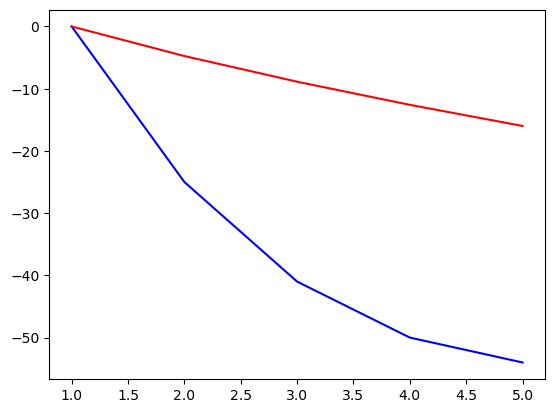

In [140]:
G = GC(J3)
g = GF(J3)
k = min(G[1],g[1])
k_value = np.linspace(1,k,k)
u0_value = [J3(u)[0] for u in G[2]]
plt.plot(k_value,u0_value,"b")

u0f_value = [J3(u)[0] for u in g[2]]
u0f_value = u0f_value[:k]
plt.plot(k_value,u0f_value,"r")

plt.show()

## Etape 3.

> - Effectuer une étude du comportement de NLGC (Fletcher-Reeves à pas constant bien choisi) vis à vis du paramètre $\epsilon$ pour la fonction quadratique suivante $(N = 10, 20, 40)$ :
$$
J_{\epsilon}(v)=\sum_{i=1}^{i=N}\left(v_{i}\right)^{2}+\frac{1}{\epsilon} \sum_{i=1}^{N-1}\left\{\left(v_{i}+v_{i+1}-N / 2\right)\right\}^{2}
$$
On fera l’étude pour $\epsilon > 0$ de plus en plus petit, par exemple $\epsilon = 10^{-p}, p = 0, 1, 2, 3$. Comparer la solution optimale calculée $u^∗$ ainsi que son coût $J_\epsilon(u^∗)$ et son gradient à ceux du vecteur $c$ défini par $c_i = N/4$ $(i = 1,\dots, N)$. Interpréter les résultats obtenus.


On rappelle que dans le cas d'une fonction quadratique
$J(v)=\frac{1}{2} \langle A v, v \rangle -\langle b, v\rangle+c$, l'algorithme NLGC (Fletcher-Reeves à pas constant) s'écrit comme suit:

**Pseudocode**

>  
- Initialisation: $u_0 \in {\mathbb R}^n$ arbitraire, $d_0 = \nabla J(u_0) \in {\mathbb R}^n$ et un pas fixe $\rho>0$
- Itérations: répéter pour $k=0,1,\dots$
  - calculer le gradient $G_k = \nabla J (u_{k})$;
  - poser $u_{k+1} = u_{k} - \rho d_k$;
  - calculer le gradient $G_{k+1}=\nabla J (u_{k+1})$;
  - calculer $\beta_k$,
  $$
  \beta_k = \frac{ \langle G_{k+1}, G_{k+1}\rangle}{\langle G_{k}, G_{k}\rangle}; \quad\text{ (Fletcher-Reeves) }
  $$
  - poser $d_{k+1} = \nabla J(u_{k+1}) + \beta_k d_k$;
- Critère d'arrêt:  $\| d_k \|_2 \leq \epsilon'$


In [147]:
def Jeps(epsilon, v):
    # Calcule du gradient
    
    N = len(v)
    grad = np.zeros(N)
    for i in range(N):
        if i == 0 :
            grad[i] = 2 * v[i] + 2/epsilon * (v[i] + v[i+1] - N/2)
        elif i == N-1 :
            grad[i] = 2 * v[i] + 2/epsilon * (v[i-1] + v[i] - N/2)
        else :
            grad[i] = 2 * v[i] + 2/epsilon * (2*v[i] + v[i-1] + v[i+1] - N)
    # Calcule de la fonction
    s1 = np.dot(v,v)
    s2 = v[1:] + v[:-1] - N/2
    s2 = np.dot(s2,s2)
    fct = s1 + s2/epsilon
    return fct,grad

eps = 1.e-1
eps = 1
v = np.zeros(10)
Jeps(eps,v)

(225.0, array([-10., -20., -20., -20., -20., -20., -20., -20., -20., -10.]))

In [163]:
## Implémenter ici l'algorithme du NLGC pour Jeps
def NLGC():
    N = 10
    rho = 0.0001
    eps = 0.001
    err = 1.e-7
    kmax = 1500
    
    u = np.zeros(N)
    d = Jeps(eps,u)[1]
    tab = []
    for i in range(kmax):
        norme = np.linalg.norm(d)
        if norme < err : break
        tab.append(u)
        uplus = u - rho * d
        beta = np.dot(Jeps(eps,uplus)[1],Jeps(eps,uplus)[1]) / np.dot(Jeps(eps,u)[1],Jeps(eps,u)[1])
        u = uplus
        d = Jeps(eps,u)[1] + beta * d
        k = i+1
    #print(Jeps(eps,u))
    return u,k,tab
        
print(NLGC()[0],NLGC()[1])

[2.4938026  2.5037036  2.4962865  2.50122712 2.49875804 2.49875804
 2.50122712 2.4962865  2.5037036  2.4938026 ] 166


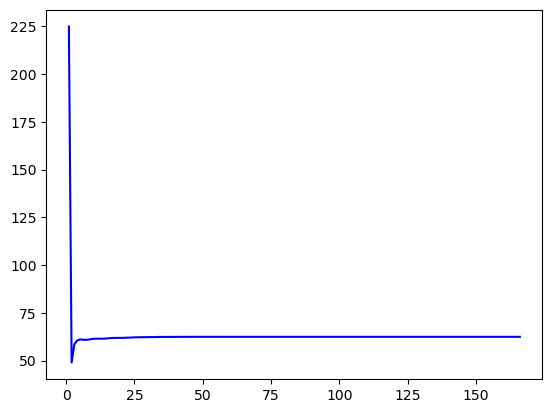

In [160]:
G = NLGC()
k = G[1]
k_value = np.linspace(1,k,k)
u0_value = [Jeps(eps,u)[0] for u in G[2]]
plt.plot(k_value,u0_value,"b")
plt.show()